In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully here!")
print(f"TensorFlow version: {tf.__version__}")


Libraries imported successfully here!
TensorFlow version: 2.20.0-dev20250704


In [2]:
# Load the dataset
lending_data = pd.read_csv('assests/lending_club_loan_two.csv')

# Display basic information about the dataset
print("Dataset Shape:", lending_data.shape)
print("\nFirst few rows:")
lending_data.head()


Dataset Shape: (396030, 27)

First few rows:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
# Get comprehensive dataset information
print("Dataset Info:")
lending_data.info()
print("\n" + "="*50)
print("Dataset Description:")
lending_data.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null 

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Target Variable Distribution:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Target Variable Percentages:
loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


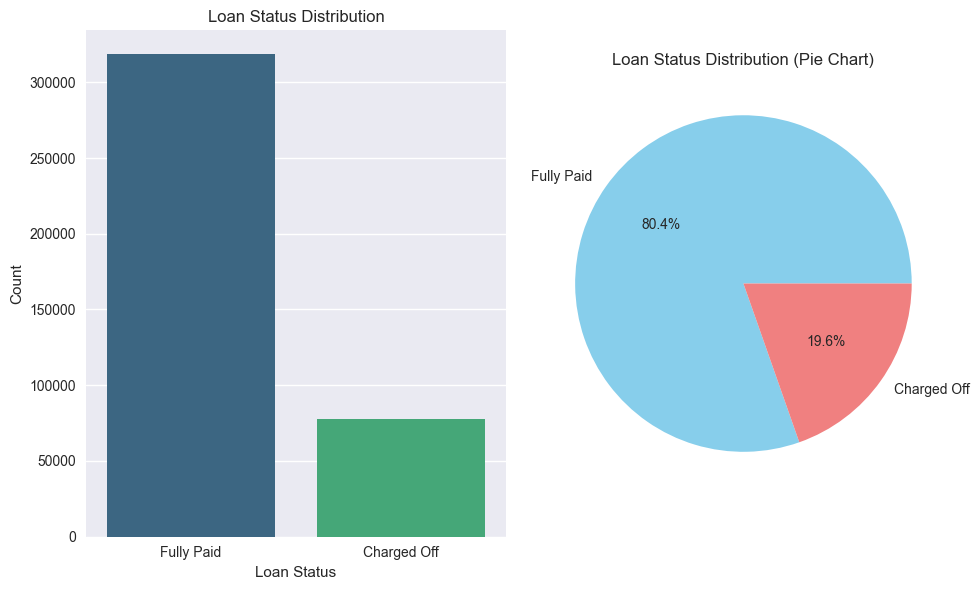

In [4]:
# Analyze target variable distribution
target_counts = lending_data['loan_status'].value_counts()
print("Target Variable Distribution:")
print(target_counts)
print("\nTarget Variable Percentages:")
print(lending_data['loan_status'].value_counts(normalize=True) * 100)

# Create visualization for target variable
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=lending_data, x='loan_status', palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Loan Status Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


Missing Values Summary:
                  Column  Missing Count  Missing Percentage
24              mort_acc          37795            9.543469
6              emp_title          22927            5.789208
7             emp_length          18301            4.621115
14                 title           1756            0.443401
25  pub_rec_bankruptcies            535            0.135091
20            revol_util            276            0.069692


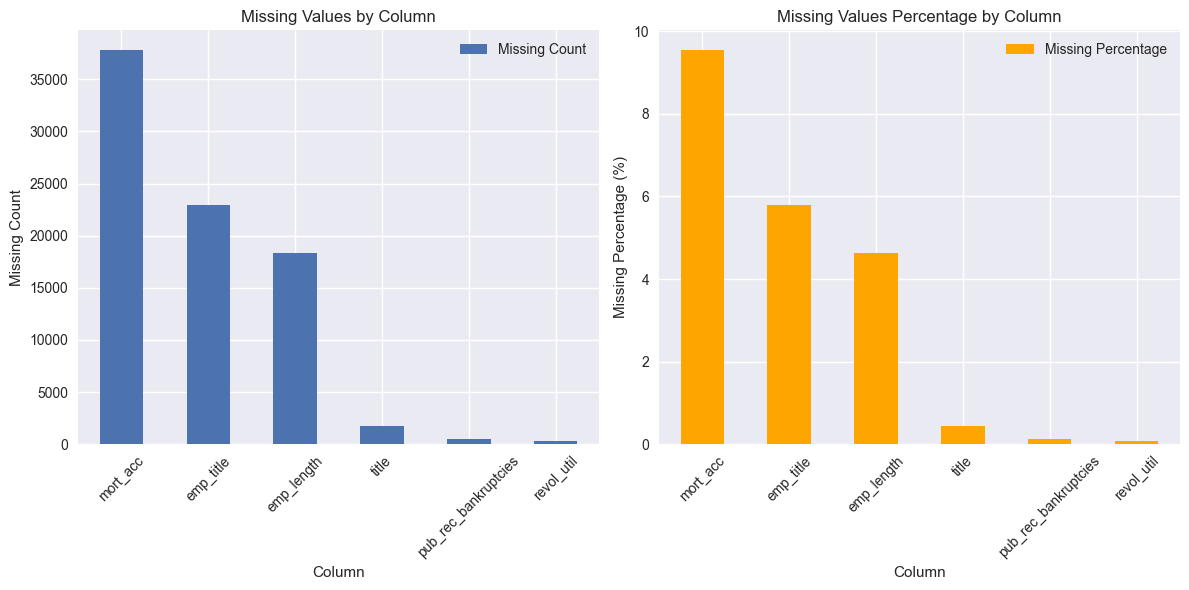

In [5]:
# Check for missing values
missing_values = lending_data.isnull().sum()
missing_percentage = (missing_values / len(lending_data)) * 100

# Create DataFrame for missing values
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df)

# Visualize missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_df.plot(x='Column', y='Missing Count', kind='bar', ax=plt.gca())
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
missing_df.plot(x='Column', y='Missing Percentage', kind='bar', ax=plt.gca(), color='orange')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Column')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Loan Amount Statistics:
count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


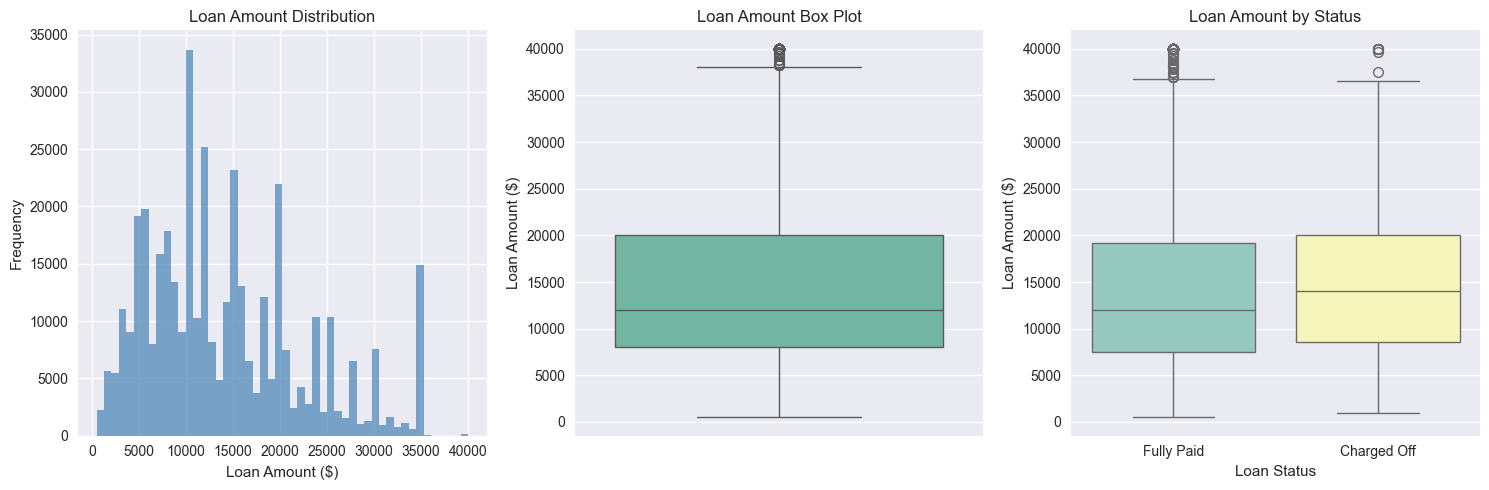

In [6]:
# Analyze loan amount distribution
print("Loan Amount Statistics:")
print(lending_data['loan_amnt'].describe())

# Create visualization for loan amount
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(lending_data['loan_amnt'], bins=50, alpha=0.7, color='steelblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(data=lending_data, y='loan_amnt', palette='Set2')
plt.title('Loan Amount Box Plot')
plt.ylabel('Loan Amount ($)')

plt.subplot(1, 3, 3)
sns.boxplot(data=lending_data, x='loan_status', y='loan_amnt', palette='Set3')
plt.title('Loan Amount by Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')

plt.tight_layout()
plt.show()


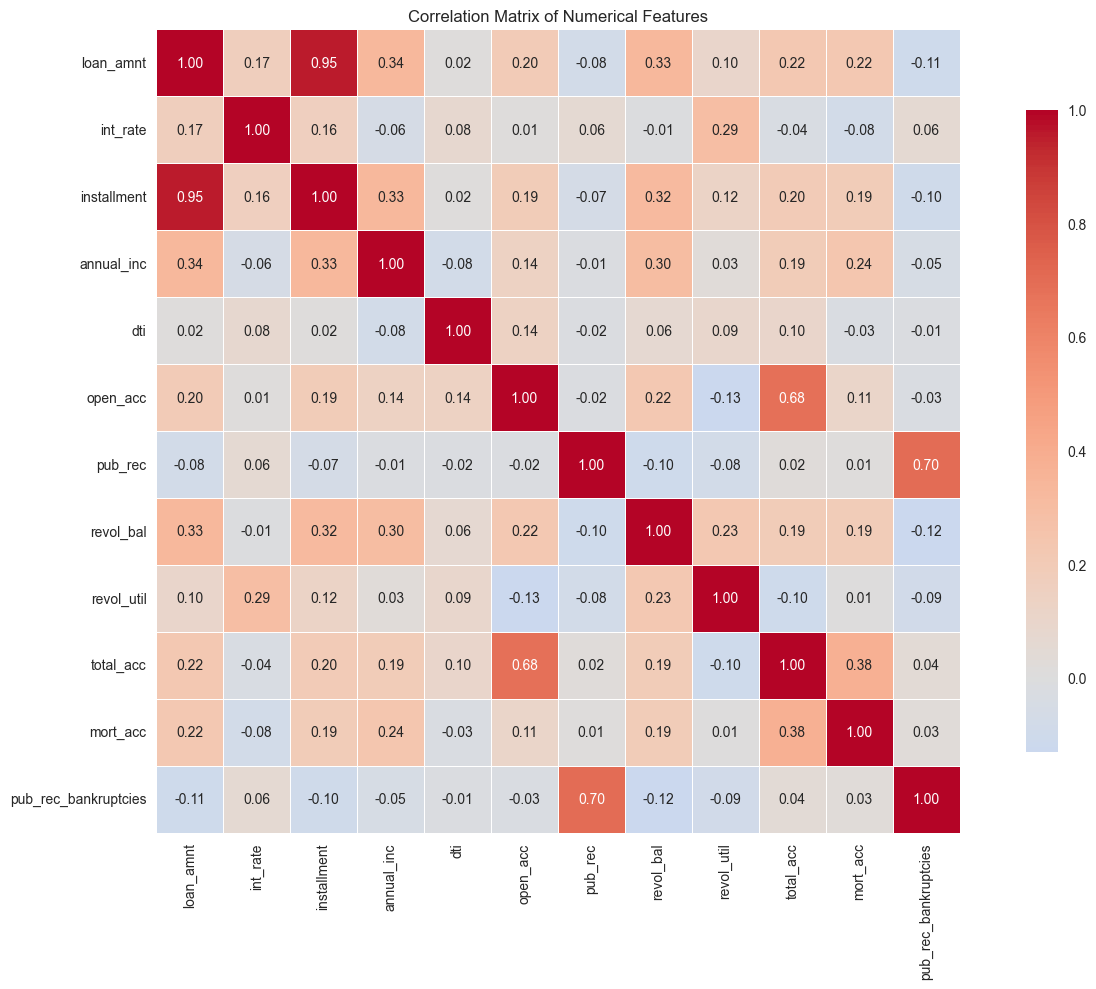

Strongest Positive Correlations:
installment           loan_amnt               0.953929
loan_amnt             installment             0.953929
pub_rec_bankruptcies  pub_rec                 0.699408
pub_rec               pub_rec_bankruptcies    0.699408
open_acc              total_acc               0.680728
total_acc             open_acc                0.680728
                      mort_acc                0.381072
mort_acc              total_acc               0.381072
loan_amnt             annual_inc              0.336887
annual_inc            loan_amnt               0.336887
dtype: float64


In [7]:
# Select only numeric columns for correlation analysis
numeric_columns = lending_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = lending_data[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show strongest correlations
print("Strongest Positive Correlations:")
correlation_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Remove self-correlations
print(correlation_pairs.head(10))


In [8]:
# Create a copy of the dataset for preprocessing
processed_data = lending_data.copy()

# Handle missing values
print("Original dataset shape:", processed_data.shape)

# Remove columns with too many missing values (>40%)
high_missing_cols = ['emp_title', 'emp_length', 'title']
processed_data = processed_data.drop(columns=high_missing_cols)
print(f"After dropping high missing columns: {processed_data.shape}")

# Handle remaining missing values
# Fill mort_acc with median grouped by total_acc
processed_data['mort_acc'] = processed_data.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))

# Fill remaining missing values with appropriate strategies
processed_data['mort_acc'].fillna(processed_data['mort_acc'].median(), inplace=True)
processed_data['pub_rec_bankruptcies'].fillna(0, inplace=True)  # Assume 0 if not mentioned
processed_data['revol_util'].fillna(processed_data['revol_util'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(processed_data.isnull().sum().sum())


Original dataset shape: (396030, 27)
After dropping high missing columns: (396030, 24)

Missing values after cleaning:
0


In [9]:
# Convert target variable to binary (0 and 1)
processed_data['loan_status'] = processed_data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Extract date features
processed_data['issue_d'] = pd.to_datetime(processed_data['issue_d'])
processed_data['earliest_cr_line'] = pd.to_datetime(processed_data['earliest_cr_line'])

# Calculate credit history length
processed_data['credit_history_length'] = (processed_data['issue_d'] - processed_data['earliest_cr_line']).dt.days / 365.25

# Drop original date columns
processed_data = processed_data.drop(columns=['issue_d', 'earliest_cr_line'])

# Check available columns before encoding
print("Available columns in dataset:")
print(processed_data.columns.tolist())
print("\nData types:")
print(processed_data.dtypes)

# Handle categorical variables - only use columns that exist
potential_categorical_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 
                             'purpose', 'initial_list_status', 'application_type', 'addr_state', 'zip_code']

# Filter to only existing columns
categorical_cols = [col for col in potential_categorical_cols if col in processed_data.columns]
print(f"\nCategorical columns to encode: {categorical_cols}")

# Use dummy variables for categorical features
processed_data = pd.get_dummies(processed_data, columns=categorical_cols, drop_first=True)

print(f"Final dataset shape after preprocessing: {processed_data.shape}")
print(f"Number of features: {processed_data.shape[1] - 1}")  # Subtract 1 for target variable


Available columns in dataset:
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'credit_history_length']

Data types:
loan_amnt                float64
term                      object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
home_ownership            object
annual_inc               float64
verification_status       object
loan_status                int64
purpose                   object
dti                      float64
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status       object
application_type          

In [10]:
# Separate features and target variable
X = processed_data.drop('loan_status', axis=1)
y = processed_data['loan_status']

# Check for any remaining string/object columns that need to be handled
print("Data types in features:")
print(X.dtypes.value_counts())
print("\nColumns by data type:")
for dtype in X.dtypes.unique():
    cols = X.select_dtypes(include=[dtype]).columns.tolist()
    print(f"{dtype}: {cols}")

# Handle any remaining string/object columns
object_cols = X.select_dtypes(include=['object']).columns.tolist()
if object_cols:
    print(f"\nRemoving remaining object columns: {object_cols}")
    X = X.drop(columns=object_cols)

# Ensure all data is numeric
X = X.select_dtypes(include=[np.number])

print(f"\nFinal feature set shape: {X.shape}")
print(f"Final feature set columns: {X.columns.tolist()}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed")
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Test features shape: {X_test_scaled.shape}")

# Check class distribution
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))


Data types in features:
bool       64
float64    13
object      1
Name: count, dtype: int64

Columns by data type:
float64: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'credit_history_length']
object: ['address']
bool: ['term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_o

In [11]:
# Create neural network model
def create_loan_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Initialize the model
input_dimensions = X_train_scaled.shape[1]
loan_model = create_loan_model(input_dimensions)

# Compile the model
loan_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("Model Architecture:")
loan_model.summary()

# Calculate class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Create a dictionary for class weights and make them more aggressive
class_weight_dict = dict(enumerate(class_weights))

# Make class weights more aggressive to better handle imbalance
class_weight_dict[0] *= 2.0  # Increase penalty for misclassifying defaults
class_weight_dict[1] *= 0.8  # Slightly reduce penalty for misclassifying fully paid

print(f"\nAggressive class weights to handle imbalance:")
print(f"Class 0 (Charged Off): {class_weight_dict[0]:.2f}")
print(f"Class 1 (Fully Paid): {class_weight_dict[1]:.2f}")
print("Higher weight = more penalty for misclassification")
print("We're being more aggressive to catch defaults!")


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)


Aggressive class weights to handle imbalance:
Class 0 (Charged Off): 5.10
Class 1 (Fully Paid): 0.50
Higher weight = more penalty for misclassification
We're being more aggressive to catch defaults!


In [12]:
# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Increased patience for better training
    restore_best_weights=True,
    verbose=1
)

# Train the model with aggressive class weights to handle imbalance
print("Starting model training with aggressive class weights...")
print("This training focuses on catching loan defaults!")
history = loan_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    batch_size=256,
    epochs=100,  # Increased epochs for better learning
    callbacks=[early_stopping],
    class_weight=class_weight_dict,  # Aggressive weights for imbalanced data
    verbose=1
)

print("Model training completed!")
print("The model has been trained to be more sensitive to defaults.")


Starting model training with aggressive class weights...
This training focuses on catching loan defaults!
Epoch 1/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3404 - loss: 0.7752 - val_accuracy: 0.3262 - val_loss: 0.9297
Epoch 2/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.3535 - loss: 0.7639 - val_accuracy: 0.3407 - val_loss: 0.9314
Epoch 3/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.3547 - loss: 0.7623 - val_accuracy: 0.3217 - val_loss: 0.9425
Epoch 4/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.3549 - loss: 0.7611 - val_accuracy: 0.3265 - val_loss: 0.9425
Epoch 5/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.3570 - loss: 0.7600 - val_accuracy: 0.3273 - val_loss: 0.9456
Epoch 6/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.3565 - loss: 0.7592 - val_accuracy: 0.3207 - val_loss: 0.9555
Epoch 7/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3586 - loss: 0.7589 - val_accuracy: 0.3253 

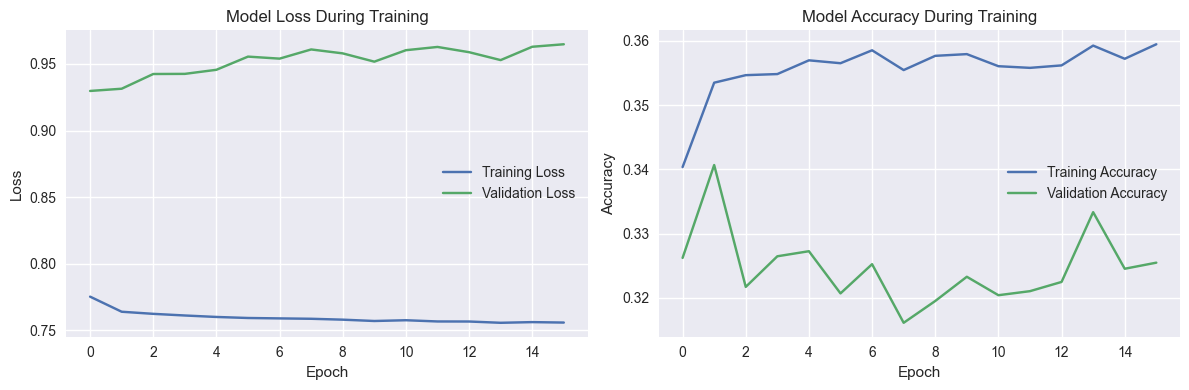

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Make predictions on test set
y_pred_proba = loan_model.predict(X_test_scaled)

# Test different thresholds to improve minority class detection
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print("Testing different classification thresholds:")
print("Threshold | Accuracy | Precision | Recall | F1-Score | Recall(Default)")
print("-" * 70)

best_threshold = 0.5
best_f1 = 0
best_recall_default = 0

for threshold in thresholds:
    y_pred_temp = (y_pred_proba > threshold).astype(int)
    
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp)
    rec = recall_score(y_test, y_pred_temp)
    f1_temp = f1_score(y_test, y_pred_temp)
    
    # Calculate recall for default class (class 0)
    recall_default = recall_score(y_test, y_pred_temp, pos_label=0)
    
    print(f"   {threshold:.1f}    |  {acc:.4f}  |   {prec:.4f}   |  {rec:.4f}  |  {f1_temp:.4f}  |    {recall_default:.4f}")
    
    # Choose threshold that balances overall F1 and default recall
    if recall_default > 0.2 and f1_temp > 0.6:  # Minimum thresholds for practical use
        if recall_default > best_recall_default:
            best_threshold = threshold
            best_f1 = f1_temp
            best_recall_default = recall_default

print(f"\nBest threshold selected: {best_threshold}")
print(f"This gives better balance between detecting defaults and overall performance")

# Use the best threshold for final predictions
y_pred = (y_pred_proba > best_threshold).astype(int)

# Calculate evaluation metrics with best threshold
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Performance (threshold = {best_threshold}):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")

# Generate classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


2476/2476 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
Testing different classification thresholds:
Threshold | Accuracy | Precision | Recall | F1-Score | Recall(Default)
----------------------------------------------------------------------
   0.3    |  0.6571  |   0.8794   |  0.6646  |  0.7571  |    0.6264
   0.4    |  0.4574  |   0.9210   |  0.3555  |  0.5130  |    0.8749
   0.5    |  0.3281  |   0.9457   |  0.1742  |  0.2942  |    0.9590
   0.6    |  0.2453  |   0.9655   |  0.0634  |  0.1189  |    0.9907
   0.7    |  0.2016  |   0.9932   |  0.0069  |  0.0137  |    0.9998

Best threshold selected: 0.3
This gives better balance between detecting defaults and overall performance

Final Model Performance (threshold = 0.3):
Accuracy: 0.6571
Precision: 0.8794
Recall: 0.6646
F1-Score: 0.7571
AUC-ROC: 0.7030

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.63      0.42     15535
           1       0.88      0.66      0.76     6367

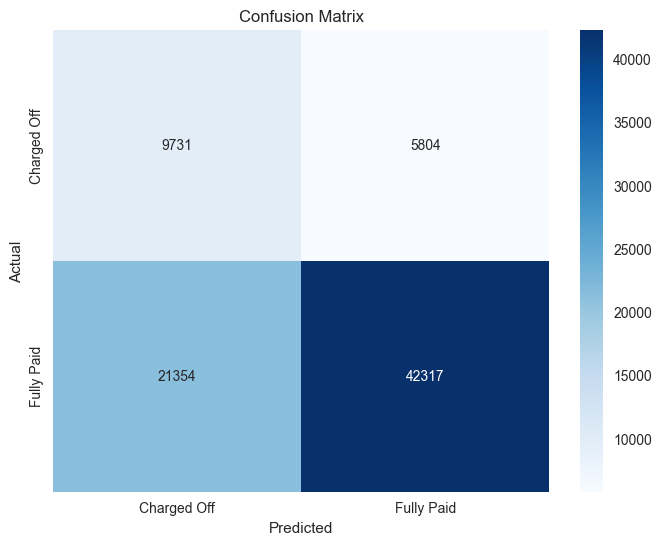

Confusion Matrix Interpretation:
True Negatives (Correctly predicted Charged Off): 9731
False Positives (Incorrectly predicted Fully Paid): 5804
False Negatives (Incorrectly predicted Charged Off): 21354
True Positives (Correctly predicted Fully Paid): 42317


In [15]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Charged Off', 'Fully Paid'],
            yticklabels=['Charged Off', 'Fully Paid'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print confusion matrix interpretation
print("Confusion Matrix Interpretation:")
print(f"True Negatives (Correctly predicted Charged Off): {conf_matrix[0][0]}")
print(f"False Positives (Incorrectly predicted Fully Paid): {conf_matrix[0][1]}")
print(f"False Negatives (Incorrectly predicted Charged Off): {conf_matrix[1][0]}")
print(f"True Positives (Correctly predicted Fully Paid): {conf_matrix[1][1]}")


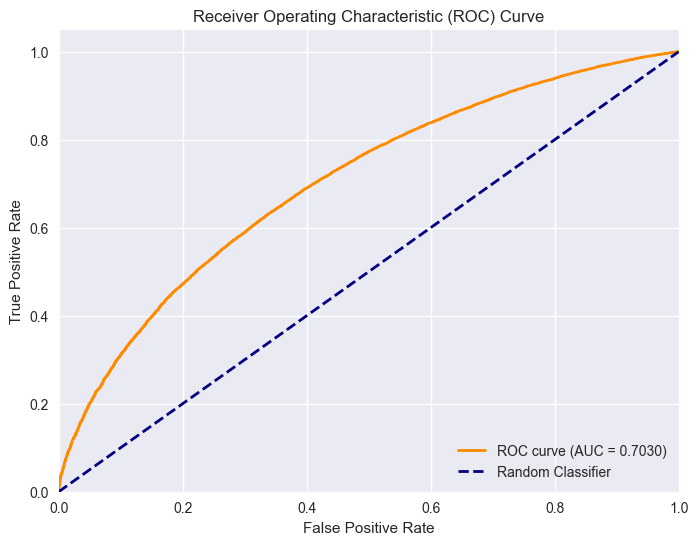

Area Under the Curve (AUC): 0.7030
AUC Interpretation:
- AUC = 0.5: Random classifier
- AUC > 0.7: Good classifier
- AUC > 0.8: Excellent classifier


In [16]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Area Under the Curve (AUC): {auc_score:.4f}")
print("AUC Interpretation:")
print("- AUC = 0.5: Random classifier")
print("- AUC > 0.7: Good classifier")
print("- AUC > 0.8: Excellent classifier")


Calculating feature importance...
Top 15 Most Important Features:
                  feature  importance
1                int_rate    0.052837
4                     dti    0.015693
8              revol_util    0.014418
10               mort_acc    0.009797
3              annual_inc    0.009583
0               loan_amnt    0.008724
12  credit_history_length    0.004646
2             installment    0.002538
11   pub_rec_bankruptcies    0.001591
9               total_acc    0.001540
6                 pub_rec    0.000657
5                open_acc    0.000530
7               revol_bal    0.000063


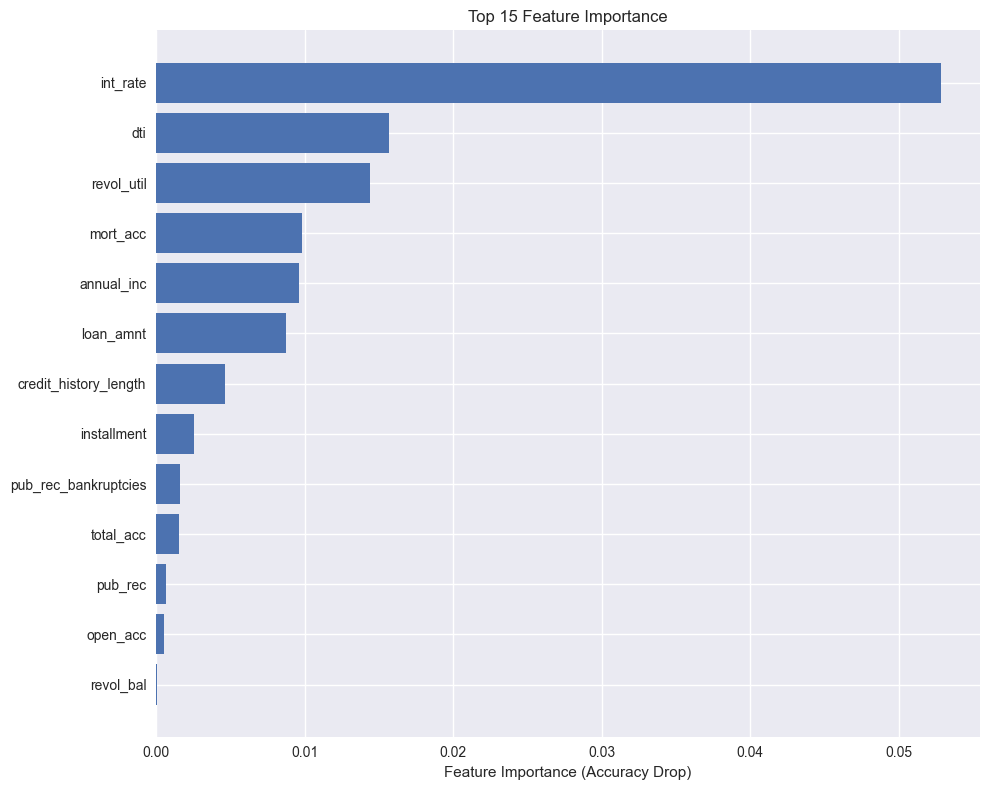

In [17]:
# Analyze feature importance using a custom approach for Keras models
# Since permutation_importance doesn't work directly with Keras models,
# we'll use a custom implementation

def calculate_feature_importance_keras(model, X_test, y_test, feature_names):
    """Calculate feature importance for Keras models using permutation method"""
    
    # Get baseline score
    baseline_score = model.evaluate(X_test, y_test, verbose=0)[1]  # accuracy
    
    importance_scores = []
    
    for i in range(X_test.shape[1]):
        # Create a copy of the test data
        X_permuted = X_test.copy()
        
        # Shuffle the i-th feature
        np.random.seed(42)
        X_permuted[:, i] = np.random.permutation(X_permuted[:, i])
        
        # Calculate score with permuted feature
        permuted_score = model.evaluate(X_permuted, y_test, verbose=0)[1]  # accuracy
        
        # Importance is the decrease in accuracy
        importance = baseline_score - permuted_score
        importance_scores.append(importance)
    
    return np.array(importance_scores)

# Get feature names
feature_names = X.columns.tolist()

# Calculate feature importance
print("Calculating feature importance...")
importance_scores = calculate_feature_importance_keras(loan_model, X_test_scaled, y_test, feature_names)

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features:")
print(importance_df.head(15))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (Accuracy Drop)')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
